# Data Preparation

## Imports

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('vehicles.csv')

## Data Exploration

In [3]:
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [5]:
df.shape

(458213, 26)

<BarContainer object of 43 artists>

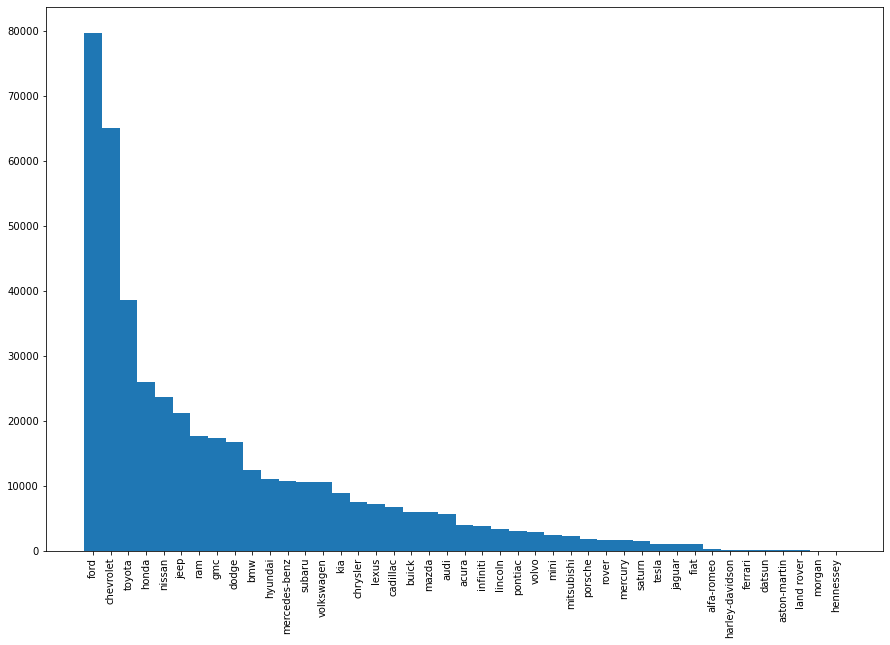

In [6]:
x = (df.groupby(['manufacturer'],as_index = False).count().sort_values('price', ascending = False))['manufacturer'].tolist()
y = (df.groupby(['manufacturer'],as_index = False).count().sort_values('price', ascending = False))['price'].tolist()
fig = plt.figure(figsize=(15,10))
plt.xticks(rotation = 90)
plt.bar(x, y, width=1)

In [7]:
#Information about the categorical variables

print(df["paint_color"].unique())
print(df["condition"].unique())
print(df["type"].unique())
print(df["fuel"].unique())
print(df["cylinders"].unique())
print(df["title_status"].unique())
print(df["type"].unique())
print(df["drive"].unique())
print(df["transmission"].unique())

[nan 'blue' 'red' 'silver' 'black' 'white' 'grey' 'orange' 'green'
 'yellow' 'custom' 'brown' 'purple']
['good' 'excellent' nan 'like new' 'fair' 'salvage' 'new']
['other' 'sedan' 'SUV' 'pickup' 'coupe' 'van' nan 'truck' 'mini-van'
 'wagon' 'convertible' 'hatchback' 'bus' 'offroad']
['gas' 'diesel' 'other' 'hybrid' nan 'electric']
['8 cylinders' '4 cylinders' '6 cylinders' nan '10 cylinders' 'other'
 '5 cylinders' '3 cylinders' '12 cylinders']
['clean' 'lien' 'missing' 'salvage' 'rebuilt' nan 'parts only']
['other' 'sedan' 'SUV' 'pickup' 'coupe' 'van' nan 'truck' 'mini-van'
 'wagon' 'convertible' 'hatchback' 'bus' 'offroad']
['rwd' 'fwd' nan '4wd']
['other' 'automatic' 'manual' nan]


In [8]:
df.isnull().sum().sort_values(ascending = False)

size            321348
condition       192940
VIN             187549
cylinders       171140
paint_color     140843
drive           134188
type            112738
odometer         55303
manufacturer     18220
lat               7448
long              7448
model             4846
fuel              3237
title_status      2577
transmission      2442
year              1050
description         70
posting_date        28
image_url           28
state                0
price                0
region_url           0
region               0
url                  0
id                   0
Unnamed: 0           0
dtype: int64

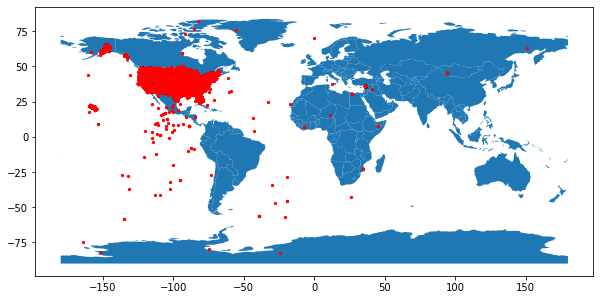

In [9]:
#a lot of locations that don't make sense (i.e. on Antarctica or in the ocean) 
#User can drop a pin anywhere in the world => lat & long values are unreliable
#Use 'state' and/or 'region' instead of lat & long for location

geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=5);

## Data Cleaning

### Dropping columns/instances

In [10]:
#drop columns that don't add any value to our analysis

df.drop(['Unnamed: 0', 'id', 'url', 'region_url', 'lat', 'long', 'VIN', 'image_url',
         'description', 'geometry', 'posting_date'], axis = 1, inplace = True)
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN,al
1,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,al
2,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,al
3,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,al
4,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,al


In [11]:
df.shape

(458213, 16)

In [12]:
#keep only 'clean' cars & missing values
#missing, parts only, etc. cars don't fit the goal of our analysis

df = df[((df['title_status'] != 'missing') & (df['title_status'] != 'parts only') 
    & (df['title_status'] != 'salvage') & (df['title_status'] != 'rebuilt')
   & (df['title_status'] != 'lien'))]
df.shape

(442203, 16)

In [13]:
#delete unrealistically over-/underpriced cars (over $500k or under $100)
#sometimes prices are $0 or $123456789 because the owner wants to agree on the price in person

df = df[((df['price'] < 500000) & (df['price'] > 100))]
df.shape

(405701, 16)

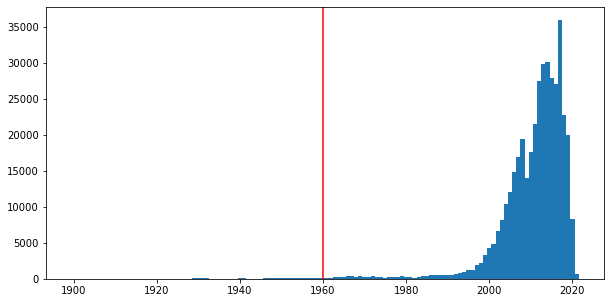

In [14]:
starting_year = 1960
x = (df.groupby(['year'],as_index = False).count())['year'].tolist()
y = (df.groupby(['year'],as_index = False).count())['price'].tolist()
fig = plt.figure(figsize=(10,5))
plt.bar(x, y, width=1)
plt.axvline(starting_year, color = 'red')

In [15]:
#delete cars built before 1960 (outliers)

df = df[df['year'] > 1960]
df.shape

(402751, 16)

In [16]:
#delete top 1% of odometer values (outliers)

top1 = np.nanpercentile(df['odometer'], 99)
print('the top 1% mileage is', top1, 'miles')
df = df[df['odometer'] < top1]
df.shape

the top 1% mileage is 272000.0 miles


(354615, 16)

In [17]:
#size is perfect multicollinear with car model => drop size column

df.drop('size', axis = 1, inplace = True)
df.shape

(354615, 15)

In [18]:
#delete unknown fuel, transmission and title_status instances

df.dropna(subset = ['fuel', 'transmission', 'title_status'], axis = 0, inplace = True)
df.shape

(349990, 15)

In [19]:
#delete all instances with unknown manufacturer

df = df[~df['manufacturer'].isnull()]
df.shape

(340030, 15)

In [20]:
#delete all instances with unknown model

df = df[~df['model'].isnull()]
df.shape

(337757, 15)

### Replacing missing values with placeholders 

In [21]:
#replace missing condition values with 'not specified'

df['condition'].fillna('not specified', inplace = True)
df['condition'].unique()

array(['good', 'excellent', 'not specified', 'like new', 'new', 'salvage',
       'fair'], dtype=object)

In [22]:
#replace missing color with 'unknown'

df['paint_color'].fillna('unknown', inplace = True)
df['paint_color'].unique()

array(['unknown', 'blue', 'red', 'silver', 'black', 'white', 'grey',
       'orange', 'green', 'custom', 'yellow', 'brown', 'purple'],
      dtype=object)

### Cleaning car model values and reducing the number of categories

In [23]:
#first word is most important for 'model': many car model categories refer to the same model but are written differently 
#(i.e. 'f150 good condition' and 'F - 150 four wheel drive' refer to the same model: f150)
#=> keep only first word and remove spaces, special characters, uppercase letters, etc.

#delete instances with a model that appears less than 150 times => reduce amount of categories by omitting uncommon types

model_list = df['model'].tolist()
model_list = map(str, model_list)
model_list = [x.lower().strip() for x in model_list]
my_list = [car_model.split()[0] for car_model in model_list]
my_list = [x.replace(' ', '').replace('-', '').replace('/', '') for x in my_list]

df['car_model'] = my_list
df['car_model'] = df['manufacturer'] + " " + df['car_model']

new_car_models = (df.groupby(['car_model'], as_index= False).count())[['manufacturer', 'car_model', 'price']]
new_car_models = new_car_models.rename(columns={'price': 'count'})
only_common_models = new_car_models[new_car_models['count'] > 150]

print('total car models: ', len(new_car_models['count']))
print('remaining car models: ', len(only_common_models['count']))
print('decreasing ', round((1-len(only_common_models['count'])/len(new_car_models['count'])) * 100, 2),'% of the number of car models')
print()
print('total instances: ', len(df['price']))
print('remaining instances: ', sum(only_common_models['count']))
print('removing ', round((1-sum(only_common_models['count'])/len(df['price'])) * 100, 2),'% of the instances')

total car models:  2803
remaining car models:  292
decreasing  89.58 % of the number of car models

total instances:  337757
remaining instances:  309211
removing  8.45 % of the instances


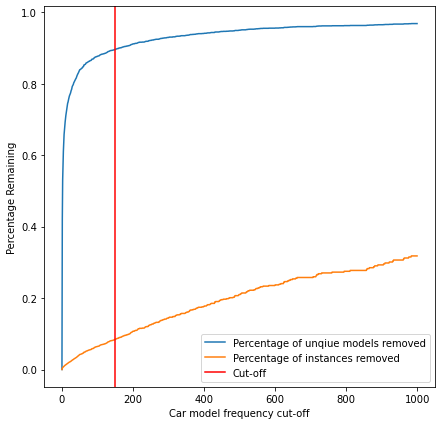

In [24]:
#150 seems like the reasonable choice w.r.t. trade-off reducing categories vs keeping enough data

removed_models_list = []
removed_instances_list = []

for i in range(0,1000):
    only_common_models_v2 = new_car_models[new_car_models['count']>i]
    models_removed = 1-len(only_common_models_v2['count'])/len(new_car_models['count'])
    instances_removed = 1-sum(only_common_models_v2['count'])/len(df['price'])
    
    removed_models_list.append(models_removed)
    removed_instances_list.append(instances_removed)

fig = plt.figure(figsize=(7,7))
plt.plot(removed_models_list, label = 'Percentage of unqiue models removed')
plt.plot(removed_instances_list, label = 'Percentage of instances removed')
plt.axvline(150 , color = 'red', label = 'Cut-off')
plt.ylabel('Percentage Remaining')
plt.xlabel('Car model frequency cut-off')
plt.legend()

In [25]:
#committing car model cleaning to original dataframe

df = df[df['car_model'].isin(only_common_models['car_model'].tolist())]
df.drop('model', axis = 1, inplace = True)
df.shape

(309211, 15)

In [26]:
df.head()

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,car_model
0,auburn,35990,2010.0,chevrolet,good,8 cylinders,gas,32742.0,clean,other,rwd,other,unknown,al,chevrolet corvette
1,auburn,7500,2014.0,hyundai,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,sedan,unknown,al,hyundai sonata
2,auburn,4900,2006.0,bmw,good,6 cylinders,gas,87046.0,clean,automatic,NaN,SUV,blue,al,bmw x3
5,auburn,29590,2016.0,toyota,good,6 cylinders,gas,33290.0,clean,other,NaN,pickup,red,al,toyota tacoma
6,auburn,39990,2012.0,ford,good,8 cylinders,gas,9692.0,clean,other,rwd,coupe,blue,al,ford mustang


### Replacing missing values with reasonable proxies

In [27]:
#replace missing number of cylinders with median of car model & delete 'other'

df = df[df['cylinders'] != 'other']
dftest = df.copy()
test = df[df['cylinders'].notnull()].copy()
test['cylinders'] = [int(cyl.split()[0]) for cyl in test['cylinders']]
med = test.groupby('car_model')['cylinders'].median()
merged = pd.merge(dftest, med, on = 'car_model', how = 'left')
merged['cylinders_y'].fillna(med.median(), inplace = True)
merged['cylinders_x'].fillna(merged['cylinders_y'], inplace = True)

li = []
for cyl in merged['cylinders_x']:
    if type(cyl) == str:
        li.append(cyl)
    else:
        li.append(str(int(cyl)) + " cylinders")

df['cylinders'] = li
df['cylinders'].unique()

array(['8 cylinders', '4 cylinders', '6 cylinders', '10 cylinders',
       '5 cylinders', '3 cylinders', '7 cylinders', '12 cylinders'],
      dtype=object)

In [28]:
#replace drive with mode drive of car model

dftest = df.copy()
test = df[df['drive'].notnull()].copy()
mode = test.groupby('car_model')['drive'].agg(pd.Series.mode)
merged = pd.merge(dftest, mode, on = 'car_model', how = 'left')
merged['drive_x'].fillna(merged['drive_y'], inplace = True)

df['drive'] = merged['drive_x'].tolist()
df['drive'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [29]:
#replace type with mode type of car model

dftest = df.copy()
test = df[df['type'].notnull()].copy()
mode = test.groupby('car_model')['type'].agg(pd.Series.mode)
for i in mode.index:
    if type(mode[i]) != str:
        mode[i] = mode[i][0]
merged = pd.merge(dftest, mode, on = 'car_model', how = 'left')
merged['type_x'].fillna(merged['type_y'], inplace = True)

df['type'] = merged['type_x'].tolist()
df['type'].unique()

array(['other', 'sedan', 'SUV', 'pickup', 'coupe', 'van', 'mini-van',
       'wagon', 'convertible', 'hatchback', 'truck', 'offroad', 'bus'],
      dtype=object)

In [30]:
#all the missing values are handled

df.isnull().sum()

region          0
price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
car_model       0
dtype: int64

### Handling price outliers

In [31]:
#get rid of overpriced cars: overpriced = more than 3 times the average for this model

df = df[df['price'] < (3 * df.groupby('car_model')['price'].transform('mean'))]
df.shape

(307422, 15)

### Dropping columns with redundant information

In [32]:
#get rid of 'title_status' since it is 'clean' for every instance

df.drop('title_status', axis = 1, inplace = True)
df.shape

(307422, 14)

In [33]:
#region & state contain same information (certain region is always in the same state)

df.drop('region', axis = 1, inplace = True)
df.shape

(307422, 13)

### Making a backup and saving the data

In [34]:
clean = df.copy()

In [35]:
df.to_csv('clean.csv', index = False)

## Feature Engineering/Selection

### Creating modeling and k-fold cross validation functions

In [132]:
#creates model as defined in 'reg' and returns test & train evaluation metrics
#default is 80/20 train-test split: industry standard

def updateModel(datafr, test_percentage = 0.2, seed = 7):
    
    #train-test split
    X = datafr.drop('price', axis = 1)
    y = datafr['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_percentage, random_state = seed)
    X_train = pd.get_dummies(X_train, drop_first = True)
    X_test = pd.get_dummies(X_test, drop_first = True)
    
    #feature scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    #making model + predicting
    reg.fit(X_train, y_train)
    y_pred_test = reg.predict(X_test)
    y_pred_train = reg.predict(X_train)
    
    #computing test & train metrics
    test_metrics = {'r2': round(r2_score(y_test, y_pred_test) * 100, 2),
           'mae': round(mean_absolute_error(y_test, y_pred_test), 2),
           'mse': round(mean_squared_error(y_test, y_pred_test), 2),
           'mape': round(mean_absolute_percentage_error(y_test, y_pred_test) * 100, 2)
           }
    train_metrics = {'r2': round(r2_score(y_train, y_pred_train) * 100, 2),
           'mae': round(mean_absolute_error(y_train, y_pred_train), 2),
           'mse': round(mean_squared_error(y_train, y_pred_train), 2),
           'mape': round(mean_absolute_percentage_error(y_train, y_pred_train) * 100, 2)
           }
    
    return {'test_metrics': test_metrics,
            'train_metrics': train_metrics}

In [37]:
#creates model as defined in 'reg' and returns k fold cross validation metrics
#default is 5-fold CV: industry standard & default scoring is MAE because of easy interpretation

def get_kCVscores(datafr, k = 5, scoring = 'neg_mean_absolute_error'):
    X = datafr.drop('price', axis = 1)
    X = pd.get_dummies(X, drop_first = True)
    y = datafr['price']
    return (cross_val_score(reg, X, y, cv = k, scoring = scoring) * (-1))

In [83]:
#K-means clustering function
def k_means_clustering(datafr, k):
    df_to_return = datafr.copy()
    df_with_dummies = pd.get_dummies(datafr, drop_first = True)
    km = KMeans(n_clusters = k)
    df_to_return['cluster'] = km.fit_predict(df_with_dummies)
    
    return df_to_return

### Baseline Linear Regression before feature engineering

In [52]:
reg = LinearRegression()

In [57]:
#initial linear regression model

init_metrics = updateModel(df)
def print_metrics(metrics):
    print('test performance:', metrics['test_metrics'])
    print('initial test performance:', init_metrics['test_metrics'])
    print()
    print('train performance:', metrics['train_metrics'])
    print('initial train performance:', init_metrics['train_metrics'])
    print()
    print('change in test MAE:', round((init_metrics['test_metrics']['mae'] - metrics['test_metrics']['mae']) / 
      (init_metrics['test_metrics']['mae']) * 100, 2), '%')
print_metrics(init_metrics)

test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56}
initial test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56}

train performance: {'r2': 73.68, 'mae': 4127.5, 'mse': 41984970.61, 'mape': 160.12}
initial train performance: {'r2': 73.68, 'mae': 4127.5, 'mse': 41984970.61, 'mape': 160.12}

change in test MAE: 0.0 %


Reasonably poor performance but no sign of overfitting

### Grouping states into North-East, Mid-West, South and West

In [58]:
regions_dict = {"state": ["al","ak","az","ar","ca","co","ct","de","dc","fl","ga","hi","id","il","in","ia","ks","ky","la","me","md","ma","mi","mn","ms","mo","mt","ne","nv","nh","nj","nm","ny","nc","nd","oh","ok","or","pa","ri","sc","sd","tn","tx","ut","vt","va","wa","wv","wi","wy"], 
         "region": ["south","west","west","south","west","west","north-east","south","south","south","south","west","west","mid-west","mid-west","mid-west","mid-west","south","south","north-east","south","north-east","mid-west","mid-west","south","mid-west","west","mid-west","west","north-east","north-east","west","north-east","south","mid-west","mid-west","south","west","north-east","north-east","south","mid-west","south","south","west","north-east","south","west","south","mid-west","west"]}
dfState = pd.merge(df, pd.DataFrame(regions_dict), on = 'state', how = 'left').drop('state', axis = 1)
dfState

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,car_model,region
0,35990,2010.0,chevrolet,good,8 cylinders,gas,32742.0,other,rwd,other,unknown,chevrolet corvette,south
1,7500,2014.0,hyundai,excellent,4 cylinders,gas,93600.0,automatic,fwd,sedan,unknown,hyundai sonata,south
2,4900,2006.0,bmw,good,6 cylinders,gas,87046.0,automatic,4wd,SUV,blue,bmw x3,south
3,29590,2016.0,toyota,good,6 cylinders,gas,33290.0,other,4wd,pickup,red,toyota tacoma,south
4,39990,2012.0,ford,good,8 cylinders,gas,9692.0,other,rwd,coupe,blue,ford mustang,south
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307417,19950,2017.0,audi,not specified,4 cylinders,gas,101270.0,automatic,4wd,sedan,unknown,audi a4,mid-west
307418,14995,2014.0,cadillac,excellent,6 cylinders,gas,83790.0,automatic,4wd,SUV,silver,cadillac srx,mid-west
307419,17895,2018.0,hyundai,excellent,4 cylinders,gas,31888.0,automatic,4wd,SUV,white,hyundai tucson,mid-west
307420,17900,2014.0,cadillac,excellent,6 cylinders,gas,53000.0,automatic,4wd,coupe,black,cadillac cts,west


In [59]:
#new metrics

binned_states_metrics = updateModel(dfState)
print_metrics(binned_states_metrics)

test performance: {'r2': 73.81, 'mae': 4115.3, 'mse': 41603557.55, 'mape': 160.2}
initial test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56}

train performance: {'r2': 73.45, 'mae': 4130.22, 'mse': 42345093.72, 'mape': 163.79}
initial train performance: {'r2': 73.68, 'mae': 4127.5, 'mse': 41984970.61, 'mape': 160.12}

change in test MAE: 0.08 %


almost no difference => let's try just removing region & state altogether

### Dropping 'state' variable

In [60]:
dfDropState = df.drop('state', axis = 1)
dfDropState

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,car_model
0,35990,2010.0,chevrolet,good,8 cylinders,gas,32742.0,other,rwd,other,unknown,chevrolet corvette
1,7500,2014.0,hyundai,excellent,4 cylinders,gas,93600.0,automatic,fwd,sedan,unknown,hyundai sonata
2,4900,2006.0,bmw,good,6 cylinders,gas,87046.0,automatic,4wd,SUV,blue,bmw x3
5,29590,2016.0,toyota,good,6 cylinders,gas,33290.0,other,4wd,pickup,red,toyota tacoma
6,39990,2012.0,ford,good,8 cylinders,gas,9692.0,other,rwd,coupe,blue,ford mustang
...,...,...,...,...,...,...,...,...,...,...,...,...
458207,19950,2017.0,audi,not specified,4 cylinders,gas,101270.0,automatic,4wd,sedan,unknown,audi a4
458208,14995,2014.0,cadillac,excellent,6 cylinders,gas,83790.0,automatic,4wd,SUV,silver,cadillac srx
458209,17895,2018.0,hyundai,excellent,4 cylinders,gas,31888.0,automatic,4wd,SUV,white,hyundai tucson
458210,17900,2014.0,cadillac,excellent,6 cylinders,gas,53000.0,automatic,4wd,coupe,black,cadillac cts


In [61]:
#new metrics

drop_state_metrics = updateModel(dfDropState)
print_metrics(drop_state_metrics)

test performance: {'r2': 73.67, 'mae': 4133.45, 'mse': 41815462.49, 'mape': 159.24}
initial test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56}

train performance: {'r2': 73.34, 'mae': 4149.45, 'mse': 42526710.18, 'mape': 162.71}
initial train performance: {'r2': 73.68, 'mae': 4127.5, 'mse': 41984970.61, 'mape': 160.12}

change in test MAE: -0.36 %


test MAE became (marginally) worse, so let's keep the 'state' feature

### Excluding car_model (many categories)

In [62]:
dfNoCarModel = df.drop('car_model', axis = 1)
dfNoCarModel

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state
0,35990,2010.0,chevrolet,good,8 cylinders,gas,32742.0,other,rwd,other,unknown,al
1,7500,2014.0,hyundai,excellent,4 cylinders,gas,93600.0,automatic,fwd,sedan,unknown,al
2,4900,2006.0,bmw,good,6 cylinders,gas,87046.0,automatic,4wd,SUV,blue,al
5,29590,2016.0,toyota,good,6 cylinders,gas,33290.0,other,4wd,pickup,red,al
6,39990,2012.0,ford,good,8 cylinders,gas,9692.0,other,rwd,coupe,blue,al
...,...,...,...,...,...,...,...,...,...,...,...,...
458207,19950,2017.0,audi,not specified,4 cylinders,gas,101270.0,automatic,4wd,sedan,unknown,wi
458208,14995,2014.0,cadillac,excellent,6 cylinders,gas,83790.0,automatic,4wd,SUV,silver,wi
458209,17895,2018.0,hyundai,excellent,4 cylinders,gas,31888.0,automatic,4wd,SUV,white,wi
458210,17900,2014.0,cadillac,excellent,6 cylinders,gas,53000.0,automatic,4wd,coupe,black,wy


In [63]:
no_car_model_metrics = updateModel(dfNoCarModel)
print_metrics(no_car_model_metrics)

test performance: {'r2': 69.18, 'mae': 4675.65, 'mse': 48944515.82, 'mape': 164.77}
initial test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56}

train performance: {'r2': 68.99, 'mae': 4685.52, 'mse': 49464753.59, 'mape': 167.43}
initial train performance: {'r2': 73.68, 'mae': 4127.5, 'mse': 41984970.61, 'mape': 160.12}

change in test MAE: -13.53 %


even though 'car_model' has many categories, it still clearly provides useful information

### Binning 'year' variable

In [64]:
dfBinnedYear = df.copy()
dfBinnedYear['year'] = pd.cut(df['year'], 3, labels = ['vintage', 'medium age', 'recent'])
dfBinnedYear

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,car_model
0,35990,recent,chevrolet,good,8 cylinders,gas,32742.0,other,rwd,other,unknown,al,chevrolet corvette
1,7500,recent,hyundai,excellent,4 cylinders,gas,93600.0,automatic,fwd,sedan,unknown,al,hyundai sonata
2,4900,recent,bmw,good,6 cylinders,gas,87046.0,automatic,4wd,SUV,blue,al,bmw x3
5,29590,recent,toyota,good,6 cylinders,gas,33290.0,other,4wd,pickup,red,al,toyota tacoma
6,39990,recent,ford,good,8 cylinders,gas,9692.0,other,rwd,coupe,blue,al,ford mustang
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458207,19950,recent,audi,not specified,4 cylinders,gas,101270.0,automatic,4wd,sedan,unknown,wi,audi a4
458208,14995,recent,cadillac,excellent,6 cylinders,gas,83790.0,automatic,4wd,SUV,silver,wi,cadillac srx
458209,17895,recent,hyundai,excellent,4 cylinders,gas,31888.0,automatic,4wd,SUV,white,wi,hyundai tucson
458210,17900,recent,cadillac,excellent,6 cylinders,gas,53000.0,automatic,4wd,coupe,black,wy,cadillac cts


In [65]:
binned_year_metrics = updateModel(dfBinnedYear)
print_metrics(binned_year_metrics)

test performance: {'r2': 69.01, 'mae': 4790.59, 'mse': 49215281.66, 'mape': 160.14}
initial test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56}

train performance: {'r2': 68.7, 'mae': 4810.37, 'mse': 49922343.56, 'mape': 164.05}
initial train performance: {'r2': 73.68, 'mae': 4127.5, 'mse': 41984970.61, 'mape': 160.12}

change in test MAE: -16.32 %


performance became significantly worse

### Creating feature 'age'

In [66]:
dfAge = df.copy()
dfAge['age'] = [2021 - x for x in df['year'].tolist()]
dfAge.drop('year', axis=1, inplace = True)
dfAge

,price,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,car_model,age
0,35990,chevrolet,good,8 cylinders,gas,32742.0,other,rwd,other,unknown,al,chevrolet corvette,11.0
1,7500,hyundai,excellent,4 cylinders,gas,93600.0,automatic,fwd,sedan,unknown,al,hyundai sonata,7.0
2,4900,bmw,good,6 cylinders,gas,87046.0,automatic,4wd,SUV,blue,al,bmw x3,15.0
5,29590,toyota,good,6 cylinders,gas,33290.0,other,4wd,pickup,red,al,toyota tacoma,5.0
6,39990,ford,good,8 cylinders,gas,9692.0,other,rwd,coupe,blue,al,ford mustang,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458207,19950,audi,not specified,4 cylinders,gas,101270.0,automatic,4wd,sedan,unknown,wi,audi a4,4.0
458208,14995,cadillac,excellent,6 cylinders,gas,83790.0,automatic,4wd,SUV,silver,wi,cadillac srx,7.0
458209,17895,hyundai,excellent,4 cylinders,gas,31888.0,automatic,4wd,SUV,white,wi,hyundai tucson,3.0
458210,17900,cadillac,excellent,6 cylinders,gas,53000.0,automatic,4wd,coupe,black,wy,cadillac cts,7.0


In [67]:
age_metrics = updateModel(dfAge)
print_metrics(age_metrics)

test performance: {'r2': 73.98, 'mae': 4119.01, 'mse': 41326421.63, 'mape': 156.51}
initial test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56}

train performance: {'r2': 73.68, 'mae': 4127.96, 'mse': 41984022.34, 'mape': 160.11}
initial train performance: {'r2': 73.68, 'mae': 4127.5, 'mse': 41984970.61, 'mape': 160.12}

change in test MAE: -0.01 %


performance became marginally worse => let's not include 'age'

### Creating categories for 'age'

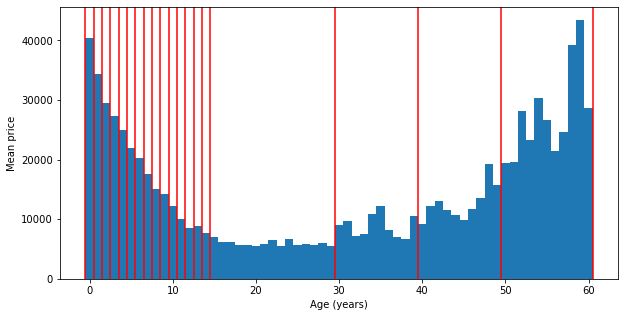

In [68]:
#we can clearly see a U-shaped pricing behavior in function of car age
#in addition, we can identify age categories with similar pricing behavior

dfAgeCat = dfAge.copy()
thresholds = [50,40,30,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
groups = ['over 50','40-49','30-39','15-29','14','13','12','11','10','9','8','7','6','5','4','3','2','1']

x = (dfAgeCat.groupby(['age'],as_index = False).mean())['age'].tolist()
y = (dfAgeCat.groupby(['age'],as_index = False).mean())['price'].tolist()
fig = plt.figure(figsize=[10,5])
plt.ylabel('Mean price')
plt.xlabel('Age (years)')
plt.bar(x, y, width=1)
for t in thresholds:
    plt.axvline(t-0.5, color = 'red')

plt.axvline(-0.5, color = 'red')
plt.axvline(60.5, color = 'red')

In [69]:
arr = np.array(dfAgeCat['age'].tolist())
for t in thresholds:
    prevArr = arr
    arr = np.where(prevArr >= t, -t, prevArr)
    
prevArr = arr
dfAgeCat['age_group'] = np.where(prevArr >= 0, 'new', prevArr).tolist()

for i in range(len(thresholds)):
     toReplace = str(float(-thresholds[i]))
     dfAgeCat['age_group'].replace(toReplace, groups[i], inplace =  True)

dfAgeCat.drop('age', axis=1, inplace=True)    
print(dfAgeCat['age_group'].unique())
dfAgeCat

['11' '7' '15-29' '5' '9' '4' '2' '8' '1' '3' '12' '6' '10' '14' '30-39'
 '13' 'over 50' '40-49' 'new']


,price,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,car_model,age_group
0,35990,chevrolet,good,8 cylinders,gas,32742.0,other,rwd,other,unknown,al,chevrolet corvette,11
1,7500,hyundai,excellent,4 cylinders,gas,93600.0,automatic,fwd,sedan,unknown,al,hyundai sonata,7
2,4900,bmw,good,6 cylinders,gas,87046.0,automatic,4wd,SUV,blue,al,bmw x3,15-29
5,29590,toyota,good,6 cylinders,gas,33290.0,other,4wd,pickup,red,al,toyota tacoma,5
6,39990,ford,good,8 cylinders,gas,9692.0,other,rwd,coupe,blue,al,ford mustang,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458207,19950,audi,not specified,4 cylinders,gas,101270.0,automatic,4wd,sedan,unknown,wi,audi a4,4
458208,14995,cadillac,excellent,6 cylinders,gas,83790.0,automatic,4wd,SUV,silver,wi,cadillac srx,7
458209,17895,hyundai,excellent,4 cylinders,gas,31888.0,automatic,4wd,SUV,white,wi,hyundai tucson,3
458210,17900,cadillac,excellent,6 cylinders,gas,53000.0,automatic,4wd,coupe,black,wy,cadillac cts,7


In [70]:
age_cat_metrics = updateModel(dfAgeCat)
print_metrics(age_cat_metrics)

test performance: {'r2': 77.29, 'mae': 3887.25, 'mse': 36075071.28, 'mape': 154.66}
initial test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56}

train performance: {'r2': 77.13, 'mae': 3907.67, 'mse': 36475073.3, 'mape': 158.25}
initial train performance: {'r2': 73.68, 'mae': 4127.5, 'mse': 41984970.61, 'mape': 160.12}

change in test MAE: 5.62 %


despite the fact that including 'age' decreased performance, including age categories clearly improved performance without any sign of overfitting

### Price vs features analysis

manufacturer


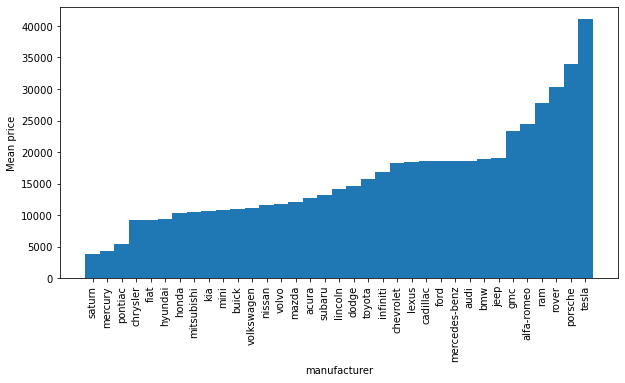

condition


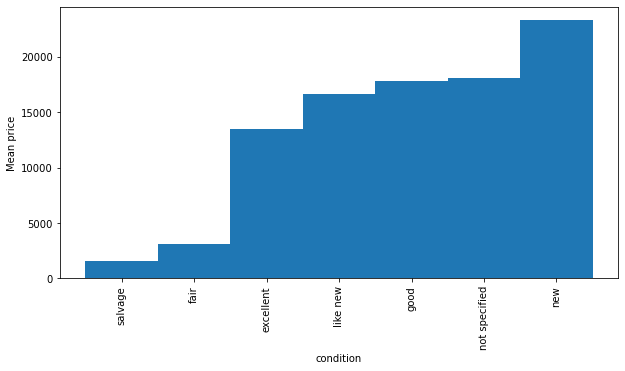

cylinders


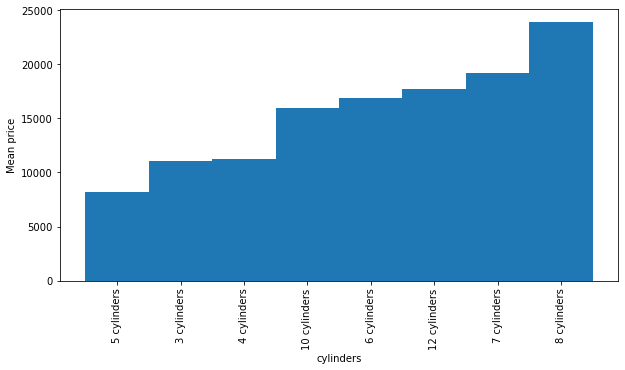

fuel


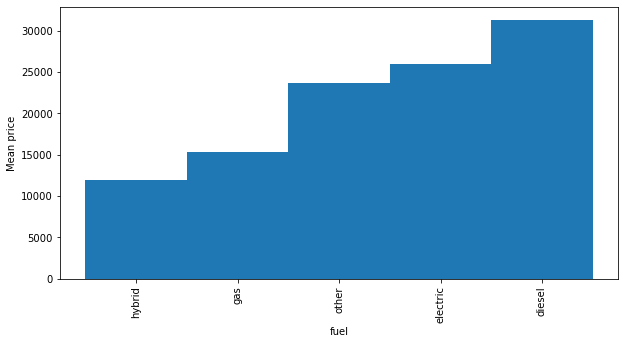

transmission


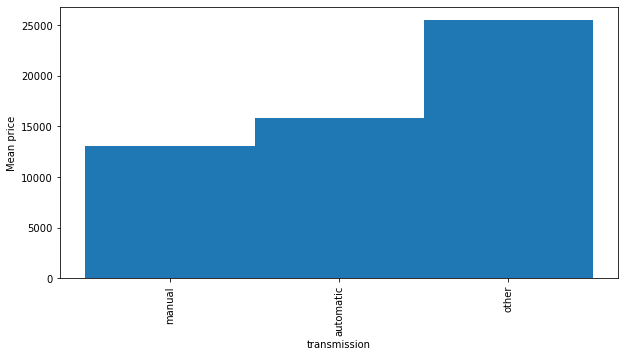

drive


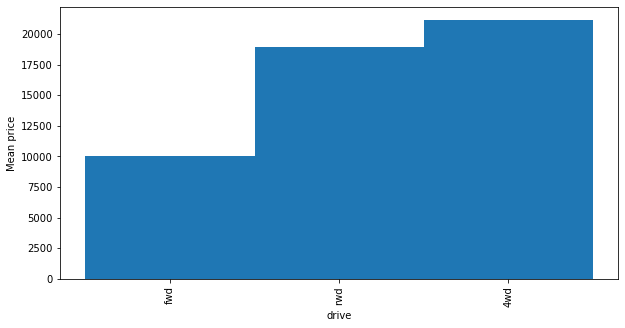

type


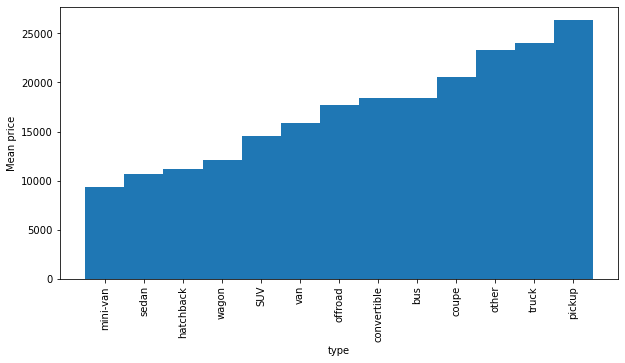

paint_color


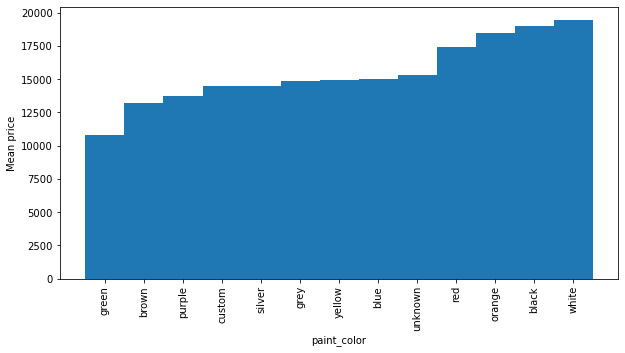

state


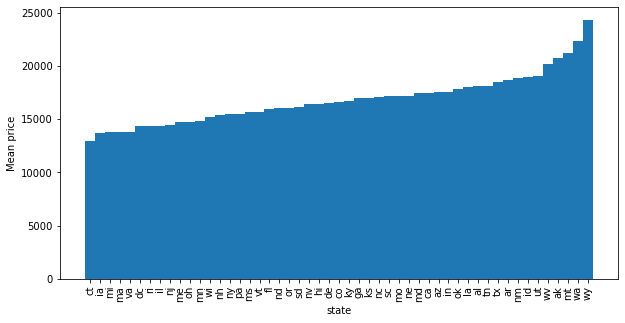

In [72]:
dfPlots = dfAge.copy()
for feat in dfAgeCat.drop(['price','odometer','car_model','age_group'], axis = 1).columns:
    print(feat)
    x = (dfPlots.groupby(feat, as_index = False).mean()).sort_values(by = ['price'])[feat]
    y = (dfPlots.groupby(feat, as_index = False).mean()).sort_values(by = ['price'])['price']
    fig = plt.figure(figsize=[10,5])
    plt.xlabel(feat)
    plt.ylabel('Mean price')
    plt.xticks(rotation = 90)
    plt.bar(x, y, width=1)
    plt.show()

### Condition as a numerical feature

In [73]:
dfCondition = df.copy()

dfCondition['condition'].replace('new', 6, inplace =  True)
dfCondition['condition'].replace('like new', 5, inplace =  True)
dfCondition['condition'].replace('excellent', 4, inplace =  True)
dfCondition['condition'].replace('good', 3, inplace =  True)
dfCondition['condition'].replace('fair', 2, inplace =  True)
dfCondition['condition'].replace('salvage', 1, inplace =  True)
dfCondition['condition'].replace('not specified', 3, inplace =  True)

dfCondition['condition'].unique()

array([3, 4, 5, 6, 1, 2], dtype=int64)

In [74]:
condition_metrics = updateModel(dfCondition)
print_metrics(condition_metrics)

test performance: {'r2': 73.86, 'mae': 4111.82, 'mse': 41520429.54, 'mape': 156.67}
initial test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56}

train performance: {'r2': 73.55, 'mae': 4119.24, 'mse': 42182376.78, 'mape': 160.23}
initial train performance: {'r2': 73.68, 'mae': 4127.5, 'mse': 41984970.61, 'mape': 160.12}

change in test MAE: 0.16 %


no significant effect on performance

### Color categories

In [75]:
dfColors = df.copy()
dfColors['paint_color'].replace(['unknown', 'blue', 'silver', 'grey', 'green', 'custom', 'yellow', 'brown', 'purple'], 'other_colors', inplace =  True)
dfColors['paint_color'].unique()

array(['other_colors', 'red', 'black', 'white', 'orange'], dtype=object)

In [76]:
color_metrics = updateModel(dfColors)
print_metrics(color_metrics)

test performance: {'r2': 73.86, 'mae': 4105.73, 'mse': 41518811.23, 'mape': 159.22}
initial test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56}

train performance: {'r2': 73.56, 'mae': 4114.33, 'mse': 42164653.59, 'mape': 162.73}
initial train performance: {'r2': 73.68, 'mae': 4127.5, 'mse': 41984970.61, 'mape': 160.12}

change in test MAE: 0.31 %


no significant effect on performance

### Miles per year

In [77]:
dfMPY = dfAge.copy()
MPY_temp = []

dfMPY['miles_per_year'] = [dfMPY['odometer'][i]/(dfMPY['age'][i]+0.001) for i in dfMPY.index.tolist()]
dfMPY.drop(['odometer', 'age'], axis=1, inplace=True)
dfMPY

,price,manufacturer,condition,cylinders,fuel,transmission,drive,type,paint_color,state,car_model,miles_per_year
0,35990,chevrolet,good,8 cylinders,gas,other,rwd,other,unknown,al,chevrolet corvette,2976.274884
1,7500,hyundai,excellent,4 cylinders,gas,automatic,fwd,sedan,unknown,al,hyundai sonata,13369.518640
2,4900,bmw,good,6 cylinders,gas,automatic,4wd,SUV,blue,al,bmw x3,5802.679821
5,29590,toyota,good,6 cylinders,gas,other,4wd,pickup,red,al,toyota tacoma,6656.668666
6,39990,ford,good,8 cylinders,gas,other,rwd,coupe,blue,al,ford mustang,1076.769248
...,...,...,...,...,...,...,...,...,...,...,...,...
458207,19950,audi,not specified,4 cylinders,gas,automatic,4wd,sedan,unknown,wi,audi a4,25311.172207
458208,14995,cadillac,excellent,6 cylinders,gas,automatic,4wd,SUV,silver,wi,cadillac srx,11968.290244
458209,17895,hyundai,excellent,4 cylinders,gas,automatic,4wd,SUV,white,wi,hyundai tucson,10625.791403
458210,17900,cadillac,excellent,6 cylinders,gas,automatic,4wd,coupe,black,wy,cadillac cts,7570.347093


In [78]:
MPY_metrics = updateModel(dfMPY)
print_metrics(MPY_metrics)

test performance: {'r2': 49.22, 'mae': 6603.68, 'mse': 80659142.96, 'mape': 163.16}
initial test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56}

train performance: {'r2': 49.49, 'mae': 6588.53, 'mse': 80551501.53, 'mape': 167.08}
initial train performance: {'r2': 73.68, 'mae': 4127.5, 'mse': 41984970.61, 'mape': 160.12}

change in test MAE: -60.34 %


significant negative impact on performance

### Excluding number of cylinders

In [79]:
dfNoCyl = df.drop('cylinders', axis = 1)
dfNoCyl

,price,year,manufacturer,condition,fuel,odometer,transmission,drive,type,paint_color,state,car_model
0,35990,2010.0,chevrolet,good,gas,32742.0,other,rwd,other,unknown,al,chevrolet corvette
1,7500,2014.0,hyundai,excellent,gas,93600.0,automatic,fwd,sedan,unknown,al,hyundai sonata
2,4900,2006.0,bmw,good,gas,87046.0,automatic,4wd,SUV,blue,al,bmw x3
5,29590,2016.0,toyota,good,gas,33290.0,other,4wd,pickup,red,al,toyota tacoma
6,39990,2012.0,ford,good,gas,9692.0,other,rwd,coupe,blue,al,ford mustang
...,...,...,...,...,...,...,...,...,...,...,...,...
458207,19950,2017.0,audi,not specified,gas,101270.0,automatic,4wd,sedan,unknown,wi,audi a4
458208,14995,2014.0,cadillac,excellent,gas,83790.0,automatic,4wd,SUV,silver,wi,cadillac srx
458209,17895,2018.0,hyundai,excellent,gas,31888.0,automatic,4wd,SUV,white,wi,hyundai tucson
458210,17900,2014.0,cadillac,excellent,gas,53000.0,automatic,4wd,coupe,black,wy,cadillac cts


In [80]:
no_cyl_metrics = updateModel(dfNoCyl)
print_metrics(no_cyl_metrics)

test performance: {'r2': 73.69, 'mae': 4140.91, 'mse': 41791427.18, 'mape': 156.74}
initial test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56}

train performance: {'r2': 73.45, 'mae': 4144.26, 'mse': 42344827.22, 'mape': 160.17}
initial train performance: {'r2': 73.68, 'mae': 4127.5, 'mse': 41984970.61, 'mape': 160.12}

change in test MAE: -0.54 %


marginal negative impact on performance

### Excluding 'type'

In [81]:
dfNoType = df.drop('type', axis = 1)
dfNoType

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,paint_color,state,car_model
0,35990,2010.0,chevrolet,good,8 cylinders,gas,32742.0,other,rwd,unknown,al,chevrolet corvette
1,7500,2014.0,hyundai,excellent,4 cylinders,gas,93600.0,automatic,fwd,unknown,al,hyundai sonata
2,4900,2006.0,bmw,good,6 cylinders,gas,87046.0,automatic,4wd,blue,al,bmw x3
5,29590,2016.0,toyota,good,6 cylinders,gas,33290.0,other,4wd,red,al,toyota tacoma
6,39990,2012.0,ford,good,8 cylinders,gas,9692.0,other,rwd,blue,al,ford mustang
...,...,...,...,...,...,...,...,...,...,...,...,...
458207,19950,2017.0,audi,not specified,4 cylinders,gas,101270.0,automatic,4wd,unknown,wi,audi a4
458208,14995,2014.0,cadillac,excellent,6 cylinders,gas,83790.0,automatic,4wd,silver,wi,cadillac srx
458209,17895,2018.0,hyundai,excellent,4 cylinders,gas,31888.0,automatic,4wd,white,wi,hyundai tucson
458210,17900,2014.0,cadillac,excellent,6 cylinders,gas,53000.0,automatic,4wd,black,wy,cadillac cts


In [82]:
no_type_metrics = updateModel(dfNoType)
print_metrics(no_type_metrics)

test performance: {'r2': 73.88, 'mae': 4117.63, 'mse': 41489997.42, 'mape': 156.8}
initial test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56}

train performance: {'r2': 73.59, 'mae': 4126.87, 'mse': 42126961.65, 'mape': 160.39}
initial train performance: {'r2': 73.68, 'mae': 4127.5, 'mse': 41984970.61, 'mape': 160.12}

change in test MAE: 0.02 %


no significant effect on performance

### Committing feature engineering changes to df

In [85]:
#only creating age_groups had a positive impact on performance
#dropping 'type' and binning 'state' into regions had no real impact on performance but made the model more interpretable

df = dfAgeCat
df = pd.merge(df, pd.DataFrame(regions_dict), on = 'state', how = 'left').drop('state', axis = 1)
df.drop('type', axis = 1, inplace = True)
df

,price,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,paint_color,car_model,age_group,region
0,35990,chevrolet,good,8 cylinders,gas,32742.0,other,rwd,unknown,chevrolet corvette,11,south
1,7500,hyundai,excellent,4 cylinders,gas,93600.0,automatic,fwd,unknown,hyundai sonata,7,south
2,4900,bmw,good,6 cylinders,gas,87046.0,automatic,4wd,blue,bmw x3,15-29,south
3,29590,toyota,good,6 cylinders,gas,33290.0,other,4wd,red,toyota tacoma,5,south
4,39990,ford,good,8 cylinders,gas,9692.0,other,rwd,blue,ford mustang,9,south
...,...,...,...,...,...,...,...,...,...,...,...,...
307417,19950,audi,not specified,4 cylinders,gas,101270.0,automatic,4wd,unknown,audi a4,4,mid-west
307418,14995,cadillac,excellent,6 cylinders,gas,83790.0,automatic,4wd,silver,cadillac srx,7,mid-west
307419,17895,hyundai,excellent,4 cylinders,gas,31888.0,automatic,4wd,white,hyundai tucson,3,mid-west
307420,17900,cadillac,excellent,6 cylinders,gas,53000.0,automatic,4wd,black,cadillac cts,7,west


## Model Creation

### Linear Regression

In [169]:
reg = LinearRegression()

In [170]:
#linear regression model on the feature engineered df

initLR = updateModel(df)
print_metrics(initLR)

test performance: {'r2': 77.09, 'mae': 3893.19, 'mse': 36388712.91, 'mape': 158.34}
initial test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56}

train performance: {'r2': 76.89, 'mae': 3915.14, 'mse': 36864231.18, 'mape': 162.05}
initial train performance: {'r2': 73.68, 'mae': 4127.5, 'mse': 41984970.61, 'mape': 160.12}

change in test MAE: 5.47 %


Feature engineering had a clear positive impact on performance without a sign of overfitting

### Feature Importance

In [183]:
cols = pd.get_dummies(df, drop_first = True).columns

In [197]:
importance = reg.coef_

temp = pd.DataFrame({'feat n°': [x for x in range(len(importance))],'importance': importance})
temp = temp.sort_values('importance')
worst10 = temp[:10]
best10 = temp[-10:]
best10['feat'] = cols[best10['feat n°']]
worst10['feat'] = cols[worst10['feat n°']]

<ipython-input-197-49b02853c5f0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best10['feat'] = cols[best10['feat n°']]
<ipython-input-197-49b02853c5f0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worst10['feat'] = cols[worst10['feat n°']]


<BarContainer object of 10 artists>

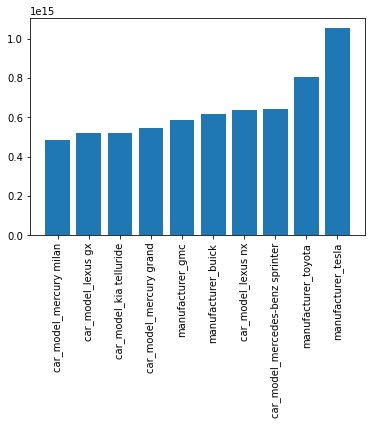

In [198]:
plt.xticks(rotation = 90)
plt.bar(best10['feat'], best10['importance'])

<BarContainer object of 10 artists>

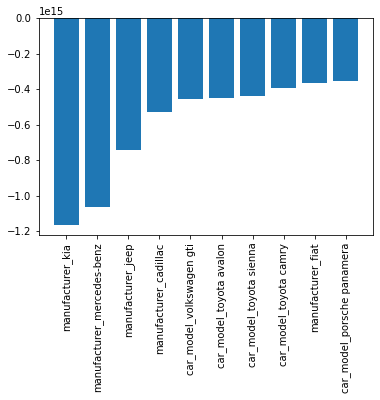

In [199]:
plt.xticks(rotation = 90)
plt.bar(worst10['feat'], worst10['importance'])

### Random Forest Regressor

In [110]:
#20-tree RF

reg = RandomForestRegressor(n_estimators = 20, random_state = 7)

In [87]:
initRF = updateModel(df)
print_metrics(initRF)

test performance: {'r2': 91.06, 'mae': 1690.99, 'mse': 14200739.7, 'mape': 73.87}
initial test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56}

train performance: {'r2': 98.12, 'mae': 690.12, 'mse': 2999876.55, 'mape': 30.71}
initial train performance: {'r2': 73.68, 'mae': 4127.5, 'mse': 41984970.61, 'mape': 160.12}

change in test MAE: 58.94 %


In [111]:
kcv = get_kCVscores(df)
kcv

array([2606.41436838, 2274.70038815, 2038.59093853, 2329.32652851,
       2444.175114  ])

In [112]:
print('Cross validated MAE mean:', kcv.mean())
print('Cross validated MAE standard deviation:', kcv.std())

Cross validated MAE mean: 2338.6414675152437
Cross validated MAE standard deviation: 188.17291337417575


In [118]:
#100-tree RF

reg = RandomForestRegressor(n_estimators = 100, random_state = 7)

In [119]:
init100RF = updateModel(df)
print_metrics(init100RF)

test performance: {'r2': 91.35, 'mae': 1647.87, 'mse': 13731284.05, 'mape': 73.77}
initial test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56}

train performance: {'r2': 98.29, 'mae': 655.37, 'mse': 2721549.15, 'mape': 30.68}
initial train performance: {'r2': 73.68, 'mae': 4127.5, 'mse': 41984970.61, 'mape': 160.12}

change in test MAE: 59.99 %


the 20-tree random forest drastically outperforms the linear regression

however, cross validation clearly signals an overfitting problem

### Boosted Tree Regressor

In [121]:
reg = GradientBoostingRegressor(n_estimators = 50, learning_rate = 0.1, max_depth = 1, random_state = 7, loss = 'ls')

In [122]:
initBoost = updateModel(df)
print_metrics(initBoost)

test performance: {'r2': 54.6, 'mae': 5921.78, 'mse': 72108194.69, 'mape': 179.85}
initial test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56}

train performance: {'r2': 54.39, 'mae': 5959.94, 'mse': 72746810.89, 'mape': 182.09}
initial train performance: {'r2': 73.68, 'mae': 4127.5, 'mse': 41984970.61, 'mape': 160.12}

change in test MAE: -43.78 %


Boosted Tree performs significantly worse than linear regression

### Neural Network

In [123]:
reg = MLPRegressor()

In [124]:
initNN = updateModel(df)
print_metrics(initNN)

C:\Users\mathi\anaconda3\envs\DataAnalytics\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


test performance: {'r2': 85.85, 'mae': 2721.09, 'mse': 22477475.6, 'mape': 124.28}
initial test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56}

train performance: {'r2': 86.2, 'mae': 2680.2, 'mse': 22009531.46, 'mape': 123.53}
initial train performance: {'r2': 73.68, 'mae': 4127.5, 'mse': 41984970.61, 'mape': 160.12}

change in test MAE: 33.93 %


Better than LR but not better than RF

### Clustering

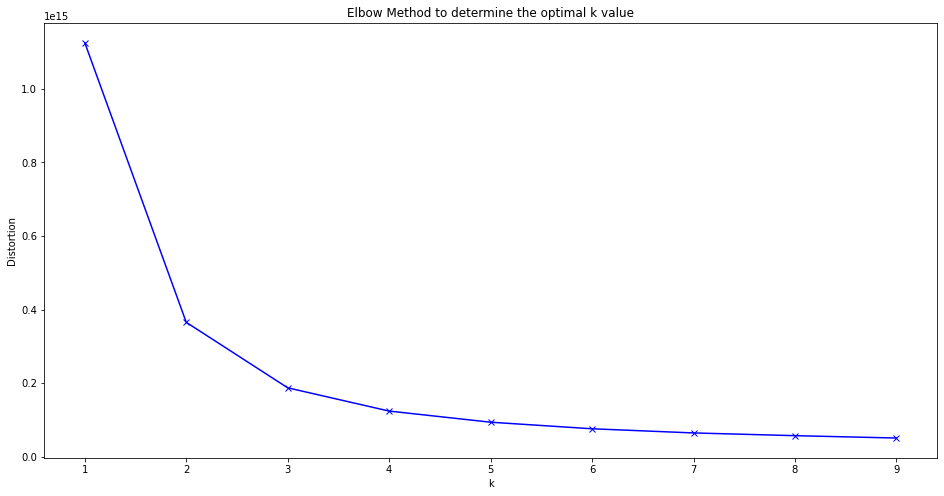

In [125]:
#Elbow plot values
distortions = []
df_with_dummies = pd.get_dummies(df.copy(), drop_first = True)

K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(df_with_dummies)
    distortions.append(km.inertia_)

#Plotting
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method to determine the optimal k value')
plt.show()

In [127]:
df_clustering_k2 = k_means_clustering(df, 2)
df_clustering_k2

,price,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,paint_color,car_model,age_group,region,cluster
0,35990,chevrolet,good,8 cylinders,gas,32742.0,other,rwd,unknown,chevrolet corvette,11,south,0
1,7500,hyundai,excellent,4 cylinders,gas,93600.0,automatic,fwd,unknown,hyundai sonata,7,south,0
2,4900,bmw,good,6 cylinders,gas,87046.0,automatic,4wd,blue,bmw x3,15-29,south,0
3,29590,toyota,good,6 cylinders,gas,33290.0,other,4wd,red,toyota tacoma,5,south,0
4,39990,ford,good,8 cylinders,gas,9692.0,other,rwd,blue,ford mustang,9,south,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307417,19950,audi,not specified,4 cylinders,gas,101270.0,automatic,4wd,unknown,audi a4,4,mid-west,1
307418,14995,cadillac,excellent,6 cylinders,gas,83790.0,automatic,4wd,silver,cadillac srx,7,mid-west,0
307419,17895,hyundai,excellent,4 cylinders,gas,31888.0,automatic,4wd,white,hyundai tucson,3,mid-west,0
307420,17900,cadillac,excellent,6 cylinders,gas,53000.0,automatic,4wd,black,cadillac cts,7,west,0


In [128]:
df_clustering_k3 = k_means_clustering(df, 3)
df_clustering_k3

,price,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,paint_color,car_model,age_group,region,cluster
0,35990,chevrolet,good,8 cylinders,gas,32742.0,other,rwd,unknown,chevrolet corvette,11,south,0
1,7500,hyundai,excellent,4 cylinders,gas,93600.0,automatic,fwd,unknown,hyundai sonata,7,south,2
2,4900,bmw,good,6 cylinders,gas,87046.0,automatic,4wd,blue,bmw x3,15-29,south,2
3,29590,toyota,good,6 cylinders,gas,33290.0,other,4wd,red,toyota tacoma,5,south,0
4,39990,ford,good,8 cylinders,gas,9692.0,other,rwd,blue,ford mustang,9,south,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307417,19950,audi,not specified,4 cylinders,gas,101270.0,automatic,4wd,unknown,audi a4,4,mid-west,2
307418,14995,cadillac,excellent,6 cylinders,gas,83790.0,automatic,4wd,silver,cadillac srx,7,mid-west,2
307419,17895,hyundai,excellent,4 cylinders,gas,31888.0,automatic,4wd,white,hyundai tucson,3,mid-west,0
307420,17900,cadillac,excellent,6 cylinders,gas,53000.0,automatic,4wd,black,cadillac cts,7,west,0


In [166]:
pd.get_dummies(df_clustering_k2, drop_first = True).groupby(['cluster']).median()

,price,odometer,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,...,age_group_5,age_group_6,age_group_7,age_group_8,age_group_9,age_group_new,age_group_over 50,region_north-east,region_south,region_west
cluster,,,,,,,,,,,,,,,,,,,,,
0,19990,46176.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7495,140000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


interpretation: cluster 0 are more expensive cars with low mileage while cluster 1 are cheap cars with a lot of mileage

In [168]:
pd.get_dummies(df_clustering_k3, drop_first = True).groupby(['cluster']).median()

,price,odometer,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,...,age_group_5,age_group_6,age_group_7,age_group_8,age_group_9,age_group_new,age_group_over 50,region_north-east,region_south,region_west
cluster,,,,,,,,,,,,,,,,,,,,,
0,23319,33305.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5990,170018.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10795,103075.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


interpretation: analogous but with an extra 'medium priced' category

In [141]:
reg = LinearRegression()

In [143]:
df_to_use = pd.get_dummies(df_clustering_k2, drop_first = True)
k = 2
print('For k = ', k)

list_of_results = []
for i in range(k):
    cluster_df = (df_to_use[df_to_use['cluster']==i]).copy()
    res = updateModel(cluster_df)
    print_metrics(res)
    list_of_results.append(res)

clust_k2_LR_results = list_of_results

For k =  2
test performance: {'r2': 72.1, 'mae': 4363.49, 'mse': 48089239.06, 'mape': 191.7}
initial test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56}

train performance: {'r2': 72.53, 'mae': 4320.59, 'mse': 46709019.02, 'mape': 198.6}
initial train performance: {'r2': 73.68, 'mae': 4127.5, 'mse': 41984970.61, 'mape': 160.12}

change in test MAE: -5.95 %
test performance: {'r2': 75.93, 'mae': 2494.78, 'mse': 14887062.68, 'mape': 89.73}
initial test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56}

train performance: {'r2': 76.99, 'mae': 2466.04, 'mse': 14295001.77, 'mape': 88.94}
initial train performance: {'r2': 73.68, 'mae': 4127.5, 'mse': 41984970.61, 'mape': 160.12}

change in test MAE: 39.43 %


In [144]:
df_to_use = pd.get_dummies(df_clustering_k3, drop_first = True)
k = 3
print('For k = ', k)

list_of_results = []
for i in range(k):
    cluster_df = (df_to_use[df_to_use['cluster']==i]).copy()
    res = updateModel(cluster_df)
    print_metrics(res)
    list_of_results.append(res)

clust_k3_LR_results = list_of_results

For k =  3
test performance: {'r2': 70.17, 'mae': 4513.3, 'mse': 51780455.29, 'mape': 197.14}
initial test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56}

train performance: {'r2': 70.55, 'mae': 4482.21, 'mse': 50993957.48, 'mape': 196.18}
initial train performance: {'r2': 73.68, 'mae': 4127.5, 'mse': 41984970.61, 'mape': 160.12}

change in test MAE: -9.58 %
test performance: {'r2': -3.260428565618925e+21, 'mae': 335333186237.85, 'mse': 1.540767214292546e+27, 'mape': 3899223132.53}
initial test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56}

train performance: {'r2': 78.38, 'mae': 2109.17, 'mse': 10179973.99, 'mape': 63.86}
initial train performance: {'r2': 73.68, 'mae': 4127.5, 'mse': 41984970.61, 'mape': 160.12}

change in test MAE: -8141980884.61 %
test performance: {'r2': 75.34, 'mae': 3014.23, 'mse': 22613279.14, 'mape': 141.88}
initial test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56

K=2 seems to improve performance the most and the clusters are also more interpretable

In [145]:
reg = RandomForestRegressor(n_estimators = 20, random_state = 7)

In [146]:
df_to_use = pd.get_dummies(df_clustering_k2, drop_first = True)
k = 2
print('For k = ', k)

list_of_results = []
for i in range(k):
    cluster_df = (df_to_use[df_to_use['cluster']==i]).copy()
    res = updateModel(cluster_df)
    print_metrics(res)
    list_of_results.append(res)

clust_k2_RF_results = list_of_results

For k =  2
test performance: {'r2': 87.92, 'mae': 2011.29, 'mse': 20828562.26, 'mape': 95.45}
initial test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56}

train performance: {'r2': 97.39, 'mae': 836.67, 'mse': 4436375.43, 'mape': 40.9}
initial train performance: {'r2': 73.68, 'mae': 4127.5, 'mse': 41984970.61, 'mape': 160.12}

change in test MAE: 51.17 %
test performance: {'r2': 90.01, 'mae': 1295.4, 'mse': 6178244.65, 'mape': 44.0}
initial test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56}

train performance: {'r2': 97.83, 'mae': 527.38, 'mse': 1347392.85, 'mape': 19.34}
initial train performance: {'r2': 73.68, 'mae': 4127.5, 'mse': 41984970.61, 'mape': 160.12}

change in test MAE: 68.55 %


In [148]:
print_metrics(initRF)

test performance: {'r2': 91.35, 'mae': 1647.87, 'mse': 13731284.05, 'mape': 73.77}
initial test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56}

train performance: {'r2': 98.29, 'mae': 655.37, 'mse': 2721549.15, 'mape': 30.68}
initial train performance: {'r2': 73.68, 'mae': 4127.5, 'mse': 41984970.61, 'mape': 160.12}

change in test MAE: 59.99 %


### Final Model

In [155]:
dfFinal = df_clustering_k2.copy()
dfFinal

,price,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,paint_color,car_model,age_group,region,cluster
0,35990,chevrolet,good,8 cylinders,gas,32742.0,other,rwd,unknown,chevrolet corvette,11,south,0
1,7500,hyundai,excellent,4 cylinders,gas,93600.0,automatic,fwd,unknown,hyundai sonata,7,south,0
2,4900,bmw,good,6 cylinders,gas,87046.0,automatic,4wd,blue,bmw x3,15-29,south,0
3,29590,toyota,good,6 cylinders,gas,33290.0,other,4wd,red,toyota tacoma,5,south,0
4,39990,ford,good,8 cylinders,gas,9692.0,other,rwd,blue,ford mustang,9,south,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307417,19950,audi,not specified,4 cylinders,gas,101270.0,automatic,4wd,unknown,audi a4,4,mid-west,1
307418,14995,cadillac,excellent,6 cylinders,gas,83790.0,automatic,4wd,silver,cadillac srx,7,mid-west,0
307419,17895,hyundai,excellent,4 cylinders,gas,31888.0,automatic,4wd,white,hyundai tucson,3,mid-west,0
307420,17900,cadillac,excellent,6 cylinders,gas,53000.0,automatic,4wd,black,cadillac cts,7,west,0


In [153]:
finalPerformance = clust_k2_RF_results
print('Cluster 1:')
print_metrics(finalPerformance[0])
print()
print('Cluster 2:')
print_metrics(finalPerformance[1])

Cluster 1:
test performance: {'r2': 87.92, 'mae': 2011.29, 'mse': 20828562.26, 'mape': 95.45}
initial test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56}

train performance: {'r2': 97.39, 'mae': 836.67, 'mse': 4436375.43, 'mape': 40.9}
initial train performance: {'r2': 73.68, 'mae': 4127.5, 'mse': 41984970.61, 'mape': 160.12}

change in test MAE: 51.17 %

Cluster 2:
test performance: {'r2': 90.01, 'mae': 1295.4, 'mse': 6178244.65, 'mape': 44.0}
initial test performance: {'r2': 73.97, 'mae': 4118.57, 'mse': 41335994.62, 'mape': 156.56}

train performance: {'r2': 97.83, 'mae': 527.38, 'mse': 1347392.85, 'mape': 19.34}
initial train performance: {'r2': 73.68, 'mae': 4127.5, 'mse': 41984970.61, 'mape': 160.12}

change in test MAE: 68.55 %


In [154]:
finalModel = reg
reg

RandomForestRegressor(n_estimators=20, random_state=7)

In [165]:
finalClusters = df_clustering_k2.copy()
pd.get_dummies(finalClusters, drop_first = True).groupby(['cluster']).median()

,price,odometer,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,...,age_group_5,age_group_6,age_group_7,age_group_8,age_group_9,age_group_new,age_group_over 50,region_north-east,region_south,region_west
cluster,,,,,,,,,,,,,,,,,,,,,
0,19990,46176.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7495,140000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [202]:
dfFinal.to_csv('final')